# Exploratory Data Analysis

Apache Spark can be used to perform exploratory data analysis. In this section we will demonstrate data exploration, data wrangling and model training.

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import pandas as pd
import seaborn as sns
from IPython.core.display import display

/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_7643/605656743.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/18 14:35:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/18 14:35:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Customize display settings

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 144
sns.set(color_codes=True)

In [7]:
schema = "polarity FLOAT, id LONG, date_time STRING, query STRING, user STRING, text STRING"
spark_reader = spark.read.schema(schema)

In [9]:
file_path = '../xdata/people.csv'

In [15]:
data = spark.read.csv(file_path)
data.count()

100001

In [17]:
data.summary().toPandas()

25/02/18 15:11:33 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,_c0,_c1,_c2,_c3,_c4
0,count,100000,100001,100001,98081,100001
1,mean,49999.5,50099.5,None,None,None
2,stddev,28867.65779668774,28867.65779668774,None,None,None
3,min,0,100,Aaron Addesso,female,1899-08-28
4,25%,24997.0,25097.0,None,None,None
5,50%,49999.0,50099.0,None,None,None
6,75%,74992.0,75092.0,None,None,None
7,max,99999,person_id,name,sex,date of birth


/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_7643/1493507688.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.toPandas())


<AxesSubplot:ylabel='Density'>

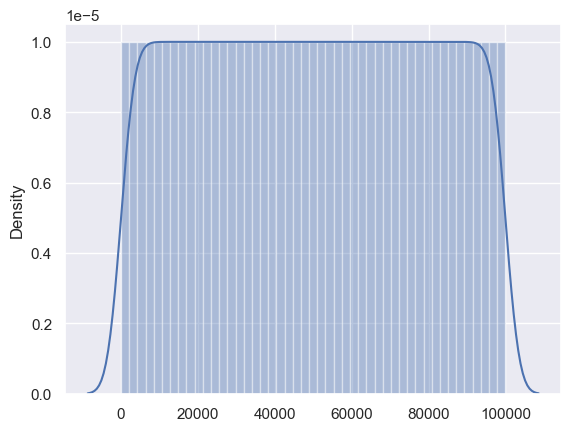

In [20]:
df = data.select("_c0").na.drop()
sns.distplot(df.toPandas())